In [1]:
import numpy as np
from skimage.io import imread, imsave, imshow
import skimage.color as color
import skimage.morphology as morph
import matplotlib.pyplot as plt
from numpy import ogrid
%matplotlib inline

Чтение изображения

In [2]:
img = imread('sample.png')
img = color.rgb2grey(img)
img.shape

(603, 1000)

Посмотрим на изображение

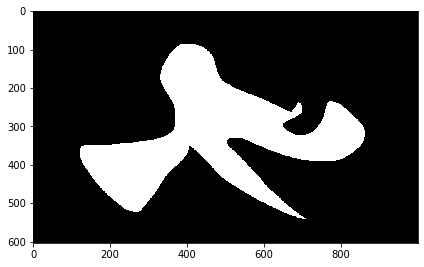

In [3]:
imshow(img)

Определим функции для создания нужных нам фигур

In [4]:
def disc_creator(shape, filled=True):
    if shape[0] != shape[1] or shape[0] % 2 == 0:
        print('Shape must be an odd square!')
        return -1
    fig = np.zeros(shape)
    center = (shape[0] - 1) / 2
    r = center
    rows, cols = ogrid[:fig.shape[0], :fig.shape[1]]
    if filled:
        mask = (rows - center)**2 + (cols - center)**2 <= r*r
        #print((rows-center)**2)
    else:
        mask = np.sqrt((rows - center)**2 + (cols - center)**2) <= r
        mask_1 = r - shape[0] // 100 - 1 <= np.sqrt((rows - center)**2 + (cols - center)**2)
        mask = mask * mask_1
    fig[mask] = 1.
    return fig
    

In [5]:
def figure_creator(fig_type, shape):
    if fig_type == 'rectangle':
        figure = np.full(shape, 1.)
    elif fig_type == 'disc':
        figure = disc_creator(shape)
    elif fig_type == 'ring':
        figure = disc_creator(shape, filled=False)
    else:
        print('Unsupported figure!')        
    return figure

{0.0: 11641, 1.0: 680}

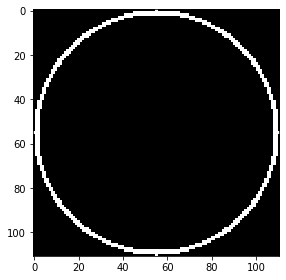

In [6]:
k = figure_creator('ring', (111,111))
imshow(k)
unique, counts = np.unique(k, return_counts=True)
dict(zip(unique, counts))